In [28]:
%run connect4.py

In [2]:
import argparse
import sys
import os
os.environ['PYGAME_HIDE_SUPPORT_PROMPT'] = "hide"
from bots import *
from board import *
from connect4 import connect4
bot_map = {
    'random': RandomBot,
    'onestep': OneStepLookAheadBot,
    'minimax': MiniMaxBot,
    'expectimax': ExpectiMaxBot,
    'montecarlo': MonteCarloBot
}

name_map = {
    'random': 'Random Bot',
    'onestep': 'One Step Look Ahead Bot',
    'minimax': 'MiniMax Bot',
    'expectimax': 'ExpectiMax Bot',
    'montecarlo': 'Monte Carlo Tree Search Bot'
}

board = Board(1)

def str2bool(v):
    if isinstance(v, bool):
       return v
    if v.lower() in ('yes', 'true', 't', 'y', '1'):
        return True
    elif v.lower() in ('no', 'false', 'f', 'n', '0'):
        return False
    else:
        raise argparse.ArgumentTypeError('Boolean value expected.')

In [3]:
bot_map

{'random': bots.random.RandomBot,
 'onestep': bots.onesteplook.OneStepLookAheadBot,
 'minimax': bots.minimax.MiniMaxBot,
 'expectimax': bots.expectimax.ExpectiMaxBot,
 'montecarlo': bots.montecarlo.MonteCarloBot}

In [4]:
p1 = bot_map['onestep'](Board.PLAYER1_PIECE)
p2 = bot_map['montecarlo'](Board.PLAYER2_PIECE)

In [5]:
connect4(p1, p2,False)

Starting game <bots.onesteplook.OneStepLookAheadBot object at 0x7fc7386cfaf0> <bots.montecarlo.MonteCarloBot object at 0x7fc7386cfd90>
1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 
PLAYER 1 WINS!

Player 1
TIME: 0.01 seconds
MOVES: 10

Player 2
TIME: 18.01 seconds
MOVES: 9


1

In [6]:
scores = [[0 for i in range(len(bot_map))] for j in range(len(bot_map))]
scores

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [15]:

for k in range(6):
    for i,p1class in enumerate(bot_map.values()):
        for j,p2class in enumerate(bot_map.values()):
            p1 = p1class(Board.PLAYER1_PIECE)
            p2 = p2class(Board.PLAYER2_PIECE)
            winner = connect4(p1,p2,False)
            if winner==1:
                scores[i][j] += 1
            elif winner==2:
                scores[i][j] -= 1
    print(scores)

Starting game <bots.random.RandomBot object at 0x7fc749fee890> <bots.random.RandomBot object at 0x7fc7386ffa00>
2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 
PLAYER 2 WINS!

Player 1
TIME: 0.00 seconds
MOVES: 10

Player 2
TIME: 0.00 seconds
MOVES: 11
Starting game <bots.random.RandomBot object at 0x7fc749fec2e0> <bots.onesteplook.OneStepLookAheadBot object at 0x7fc749fee890>
1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 
PLAYER 2 WINS!

Player 1
TIME: 0.00 seconds
MOVES: 10

Player 2
TIME: 0.02 seconds
MOVES: 10
Starting game <bots.random.RandomBot object at 0x7fc749fca7a0> <bots.minimax.MiniMaxBot object at 0x7fc749fec2e0>
1 2 1 2 1 2 1 2 
PLAYER 2 WINS!

Player 1
TIME: 0.00 seconds
MOVES: 4

Player 2
TIME: 2.00 seconds
MOVES: 4
Starting game <bots.random.RandomBot object at 0x7fc7282d6260> <bots.expectimax.ExpectiMaxBot object at 0x7fc749d81210>
1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 
PLAYER 2 WINS!

Player 1
TIME: 0.00 seconds
MOVES: 13

Player 2
TIME: 0.37 seconds
MOVES: 13
Sta

In [16]:
scores

[[-2, -6, -6, -6, -6],
 [3, 0, -6, 4, -2],
 [5, 6, -6, 6, 6],
 [7, 4, -6, -6, 2],
 [5, 2, -4, 0, 2]]

In [17]:
import copy

In [19]:
scores_nonoise = np.asarray(scores)/6
scores_nonoise

array([[-0.33333333, -1.        , -1.        , -1.        , -1.        ],
       [ 0.5       ,  0.        , -1.        ,  0.66666667, -0.33333333],
       [ 0.83333333,  1.        , -1.        ,  1.        ,  1.        ],
       [ 1.16666667,  0.66666667, -1.        , -1.        ,  0.33333333],
       [ 0.83333333,  0.33333333, -0.66666667,  0.        ,  0.33333333]])

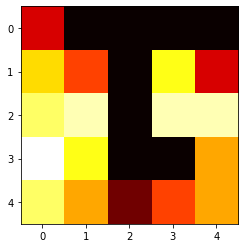

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(scores_nonoise, cmap='hot', interpolation='nearest')
plt.show()

## Now with noise

In [ ]:
scores = [[0 for i in range(len(bot_map))] for j in range(len(bot_map))]
NOISE = 0.2 
for k in range(6):
    for i,p1class in enumerate(bot_map.values()):
        for j,p2class in enumerate(bot_map.values()):
            p1 = p1class(Board.PLAYER1_PIECE)
            p2 = p2class(Board.PLAYER2_PIECE)
            winner = connect4(p1,p2,False, noise= NOISE)
            if winner==1:
                scores[i][j] += 1
            elif winner==2:
                scores[i][j] -= 1
    print(scores)

Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.random.RandomBot'> noise: 0.2
2 1 *2 1 2 1 2 1 2 1 2 *1 2 
PLAYER 2 WINS!
P1 time: 0.00 seconds MOVES: 6 | P2 time0.00 seconds MOVES: 7
Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.onesteplook.OneStepLookAheadBot'> noise: 0.2
1 2 1 *2 1 *2 *1 2 1 *2 1 2 1 2 1 *2 1 2 1 *2 *1 2 *1 2 1 2 *1 2 
PLAYER 2 WINS!
P1 time: 0.00 seconds MOVES: 14 | P2 time0.02 seconds MOVES: 14
Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.minimax.MiniMaxBot'> noise: 0.2
1 2 1 2 1 *2 1 2 1 2 
PLAYER 2 WINS!
P1 time: 0.00 seconds MOVES: 5 | P2 time2.15 seconds MOVES: 5
Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.expectimax.ExpectiMaxBot'> noise: 0.2
1 2 1 *2 1 2 *1 2 1 2 1 2 1 2 *1 2 1 2 1 2 *1 2 
PLAYER 2 WINS!
P1 time: 0.00 seconds MOVES: 11 | P2 time1.04 seconds MOVES: 11
Starting game <class 'bots.random.RandomBot'>  vs.  <class 'bots.montecarlo.MonteCarloBot'> noise: 0.2
*1 2 1 2 1 2 1